# APRENDIZAJE NO SUPERVISADO.

 EJEMPLO 1. Algoritmo K-MEANS.

 • Es el algoritmo de agrupamiento más utilizado.

• Se basa en centroides.

 • Es el algoritmo de aprendizaje no supervisado más simple. Intenta minimizar la varianza
de los datos dentro de un grupo.

• También es la forma en que la mayoría de las personas se familiarizan con el aprendizaje
automático no supervisado.

 • Es más adecuado para datasets pequeños porque itera sobre todos los datos.

• No escala bien porque es sensible a la cantidad de muestras.

 • Solo es capaz de hacer grupos de formas hiperelípticas y si hay agrupaciones que no siguen
esta organización espacial, no será capaz de definir grupos de calidad.

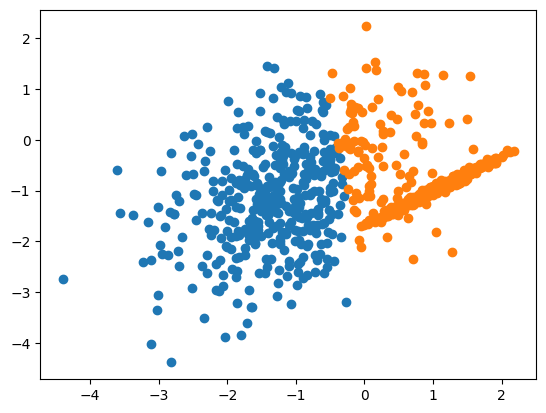

In [1]:
from numpy import unique
from numpy import where
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans

# inicializar el conjunto de datos con el que trabajaremos
train, _ = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=1234)

km = KMeans(n_clusters=2) # definir el modelo
km.fit(train) # Entrenar el modelo
predicciones = km.predict(train) # Asignar cada punto de datos a un grupo
grupos = unique(predicciones) # obtener todos los grupos únicos

# graficar los grupos KMeans
for grupo in grupos:
    indices = where(predicciones == grupo) # Obtener instancias del grupo
    plt.scatter(train[indices, 0], train[indices, 1]) # dibujarlas
    # print(indices)

plt.show()

 EJEMPLO 2: DBSCAN

 • Basado en densidad.

 • Buen algoritmo para encontrar esquemas en un conjunto de datos.

 • Mejor que k-means cuando trabaja con datos que adoptan formas extrañas.

 • Utiliza 2 hiperparámetros que controlan cómo se definen los grupos:

◦ min_samples: el número mínimo de muestras que deben agruparse para que un área se
considere de alta densidad.

 ◦ Eps: la distancia utilizada para determinar si una muestra está en la misma área que
otras muestras.

 • No necesita que se le indique la cantidad de grupos.


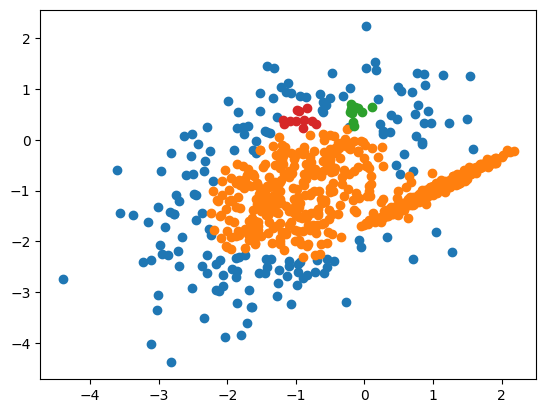

In [2]:
from sklearn.cluster import DBSCAN

# ... inicializar el conjunto de datos con el que trabajaremos (como antes)

dbscan = DBSCAN(eps=0.25, min_samples=9) # definir el modelo
dbscan.fit(train) # entrenar el modelo
predicciones = dbscan.fit_predict(train) # asignar cada punto de datos a un grupo
grupos = unique(predicciones) # obtener todos los grupos únicos

# graficar grupos DBSCAN
for grupo in grupos:
    indices = where(predicciones == grupo) # obtener datos que caen en grupo
    plt.scatter(train[indices, 0], train[indices, 1])
plt.show()

EJEMPLO 3: Algoritmo de Mezcla Gaussiana (GMM)
 • Solucionan el problema que tiene k-means que solo hace grupos circulares.
• Utiliza múltiples distribuciones Gaussianas para ajustar datos que tienen formas
arbitrarias.
 • Calcula la probabilidad de que un punto de datos pertenezca a una distribución Gaussiana
específica y ese es el grupo en el que se ubicará.

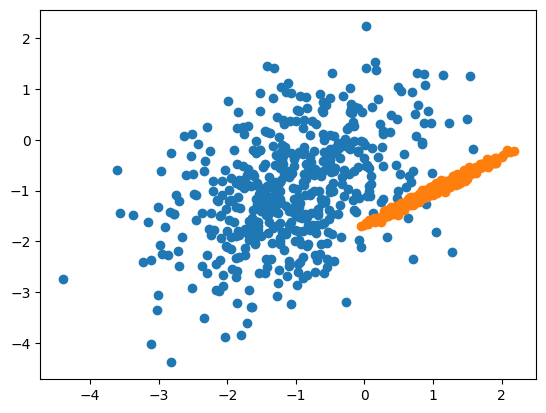

In [3]:
from sklearn.mixture import GaussianMixture

# ... inicializar el conjunto de datos con el que trabajaremos (como antes)

gm = GaussianMixture(n_components=2) # definir el modelo
gm.fit(train) # entrenar el modelo
predicciones = gm.predict(train) # asignar cada punto de datos a un grupo
grupos = unique(predicciones) # obtener todos los grupos

# graficar los grupos de Mezcla Gaussiana
for grupo in grupos:
    indices = where(predicciones == grupo)
    plt.scatter(train[indices, 0], train[indices, 1])
plt.show()

EJEMPLO 4: Algoritmo BIRCH.
 • BIRCH son las siglas de Balance Iterative Reducing and Clustering using Hierarchies
(Equilibrio Iterativo de Reducción y Agrupación mediante Jerarquías).
 • Mejor rendimiento que k-means en grandes conjuntos de datos.
 • Divide los datos en pequeños resúmenes que se agrupan en lugar de los puntos de datos
originales. Los resúmenes contienen tanta información sobre la distribución de los puntos
de datos como sea posible.
 • Se usa comúnmente con otros algoritmos de agrupamiento porque el resto de algoritmos
de agrupamiento se pueden usar en los resúmenes generados por BIRCH.
 • La principal desventaja es que solo funciona con datos numéricos. No puedes usarlo para
valores categóricos a menos que realices transformaciones de datos.


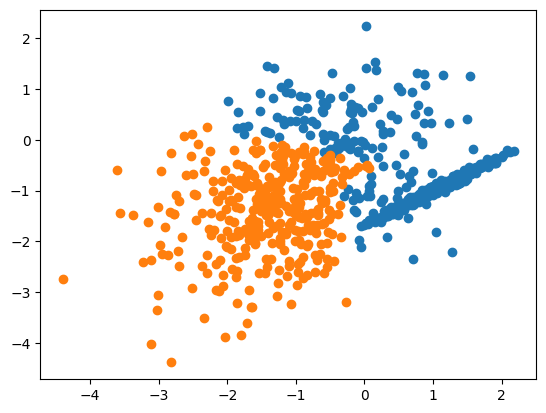

In [4]:
from sklearn.cluster import Birch

# ... inicializar el conjunto de datos con el que trabajaremos (igual)

bm = Birch(threshold=0.03, n_clusters=2) # definir el modelo
bm.fit(train) # entrenar el modelo
predicciones = bm.predict(train) # asignar cada punto de datos a un grupo
grupos = unique(predicciones) # obtener todos los grupos únicos

# graficar los grupos BIRCH
for grupo in grupos:
    indices = where(predicciones == grupo)
    plt.scatter(train[indices, 0], train[indices, 1])
plt.show()

EJEMPLO 5: Algoritmo de agrupamiento por Propagación de Afinidad
 • Este algoritmo es completamente diferente de los demás en el método que usa para
agrupar los datos.
 • Cada muestra se comunica con todas las demás para que sepan como de similares son y eso
comienza a revelar los grupos en los datos.
 • No tienes que decirle cuantos grupos hay que hacer.
 • A medida que se envían mensajes entre las muestras, se encuentran conjuntos de datos
llamados ejemplares que representan los grupos.
 • Se encuentra un ejemplar después de que las muestras se hayan transmitido mensajes entre
sí y formen un consenso sobre qué muestra representa mejor un grupo.
 • Cuando no estás seguro de cuántos grupos esperar, como por ejemplo en un problema de
visión por computadora, este es un gran algoritmo para comenzar.

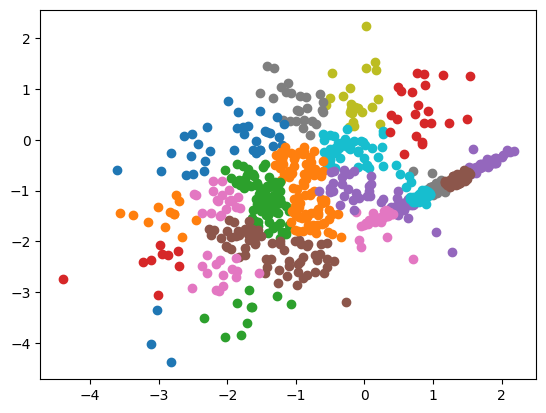

In [5]:
from sklearn.cluster import AffinityPropagation

# ... inicializar el conjunto de datos con el que trabajaremos (como antes)

am = AffinityPropagation(damping=0.7) # definir el modelo
am.fit(train) # entrenar el modelo
predicciones = am.predict(train) # asignar cada punto de datos a un grupo
grupos = unique(predicciones) # obtener todos los grupos

# graficar los grupos
for grupo in grupos:
    indices = where(predicciones == grupo)
    plt.scatter(train[indices, 0], train[indices, 1])
plt.show()

EJEMPLO 6: Algoritmo de agrupamiento de Desplazamiento Medio

 • Otro algoritmo usado para manejar imágenes y procesamiento de visión por computadora.

 • Similar al algoritmo BIRCH porque también encuentra grupos sin que se establezca un
número inicial de grupos.

 • Es un algoritmo de agrupamiento jerárquico.

 • No escala bien cuando se trabaja con grandes conjuntos de datos.

 • Funciona iterando sobre todos las muestras y las desplaza hacia la moda. La moda en este
contexto es el área de alta densidad de muestras en una región. Por eso es posible que
escuches que se hace referencia a este algoritmo como el algoritmo de búsqueda de moda.

 Cada muestra pasará por este proceso iterativo y se moverá más cerca de donde están otras
muestras hasta que todas las muestras hayan sido asignadas a un grupo.

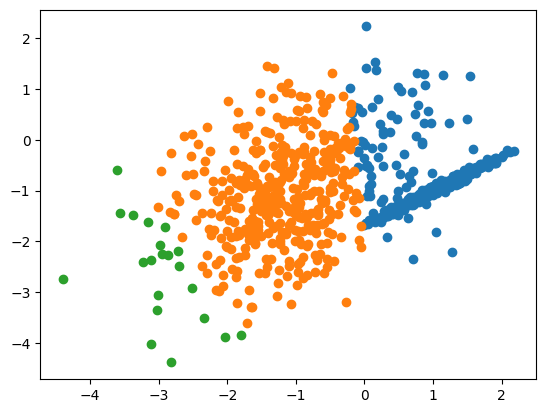

In [6]:
from sklearn.cluster import MeanShift

# ... inicializar el conjunto de datos con el que trabajaremos (igual)

ms = MeanShift() # definir el modelo
predicciones = ms.fit_predict(train) # asignar cada punto de datos a un grupo
grupos = unique(predicciones) # obtener todos los grupos

# graficar los grupos de Desplazamiento Medio
for grupo in grupos:
    indices = where(predicciones == grupo)
    plt.scatter(train[indices, 0], train[indices, 1])
plt.show()

 EJEMPLO 7: Algoritmo OPTICS.

 • OPTICS son las siglas de Ordering Points to Identify the Clustering Structure (Ordenar Puntos
para Identificar la Estructura de Agrupamiento).

• Es un algoritmo basado en densidad similar a DBSCAN, pero es mejor porque puede
encontrar agrupaciones significativas en datos que varían en densidad. Lo hace ordenando
las muestras de modo que las muestras más cercanas sean vecinas en el ordenamiento.

 • Esto facilita la detección de diferentes grupos de densidad. El algoritmo OPTICS solo
procesa cada muestra una vez, similar a DBSCAN (aunque se ejecuta más lento que DBSCAN).

• También hay una distancia especial almacenada para cada muestra que indica que una
muestra pertenece a un grupo específico.

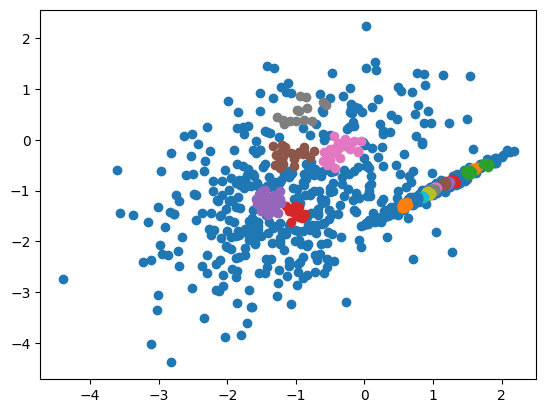

In [7]:
from sklearn.cluster import OPTICS

# ... inicializar el conjunto de datos con el que trabajaremos (igual)

om = OPTICS(eps=0.75, min_samples=10) # definir el modelo
predicciones = om.fit_predict(train) # asignar cada punto de datos a un grupo
grupos = unique(predicciones) # obtener todos los grupos

# graficar los grupos OPTICS
for grupo in grupos:
    indices = where(predicciones == grupo)
    plt.scatter(train[indices, 0], train[indices, 1])
plt.show()

EJEMPLO 8: Algoritmo de agrupamiento de Jerarquía Aglomerativa

 • Es el tipo más común de algoritmo de agrupamiento jerárquico. Agrupar datos en función
de su similitud entre sí.

 • Es una forma de agrupamiento de abajo hacia arriba, inicialmente cada muestra  se asigna a
su propio grupo. Luego, esos grupos se unen.

 • En cada iteración, grupos similares se fusionan hasta que todos los puntos de datos forman
parte de un gran grupo raíz.

 • La agrupación aglomerativa es mejor para encontrar agrupaciones pequeñas. El resultado
final parece un dendrograma para que puedas visualizar fácilmente los grupos cuando el
algoritmo termina.


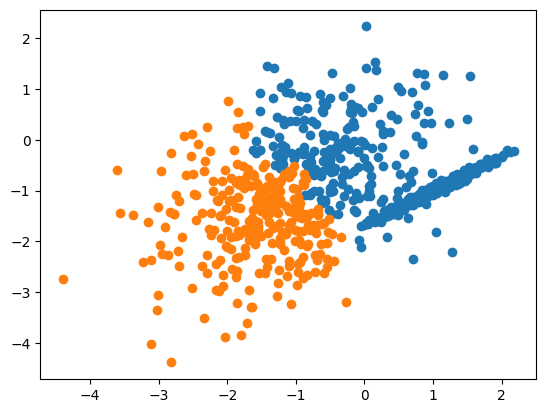

In [8]:
from sklearn.cluster import AgglomerativeClustering

# ... inicializar el conjunto de datos con el que trabajaremos (igual)

am = AgglomerativeClustering(n_clusters=2) # definir el modelo
predicciones = am.fit_predict(train) # asignar cada punto de datos a un grupo
grupos = unique(predicciones) # obtener todos los grupos

# graficar los grupos
for grupo in grupos:
    indices = where(predicciones == grupo)
    plt.scatter(train[indices, 0], train[indices, 1])
plt.show()

 EJEMPLO 9: Cálculo de la distancia basada en la correlación de Pearson.

In [9]:
import numpy as np
from scipy.stats import pearsonr
x1 = np.array([1, 2, 3, 4, 5])
x2 = np.array([2, 4, 6, 8, 10])  # Relación lineal perfecta: x2 = 2 * x1 + 0
r, p_value = pearsonr(x1, x2)
print(f"Correlación de Pearson: {r:.3f}, p-valor: {p_value:.3f}")
print(f"Distancia de correlación de Pearson: {1 - r:.3f}")

Correlación de Pearson: 1.000, p-valor: 0.000
Distancia de correlación de Pearson: 0.000


EJEMPLO 10: Cálculo de distancia basada en la correlación de Spearman.

In [10]:
import numpy as np
from scipy.stats import spearmanr
x1 = np.array([1, 2, 3, 4, 5])
x2 = np.array([10, 20, 30, 25, 15])  # Relación monótona, pero no lineal
ro, p_value = spearmanr(x1, x2)
print(f"Correlación de Spearman: {ro:.3f}, p-valor: {p_value:.3f}")
print(f"Distancia de Spearman: {1 - ro:.3f}, p-valor: {p_value:.3f}")

Correlación de Spearman: 0.300, p-valor: 0.624
Distancia de Spearman: 0.700, p-valor: 0.624


EJEMPLO 11: Cálculo de la distancia basada en la correlación de Kendall.

In [11]:
from scipy.stats import kendalltau
import numpy as np
x1 = np.array([1, 2, 3, 4, 5])
x2 = np.array([3, 2, 1, 5, 4])  # Relación con algunas discordancias
tau, p_value = kendalltau(x1, x2)
print(f"Correlación de Kendall: {tau:.3f}, p-valor: {p_value:.3f}")
print(f"Distancia de Kendall: {1 - tau:.3f}")

Correlación de Kendall: 0.200, p-valor: 0.817
Distancia de Kendall: 0.800


EJEMPLO 12: Cálculo de los coeficientes de correlación de Pearson y Jackknife con datos en
presencia de outliers.

Correlación de Pearson: -0.2046
Correlación Jackknife:  -0.1969


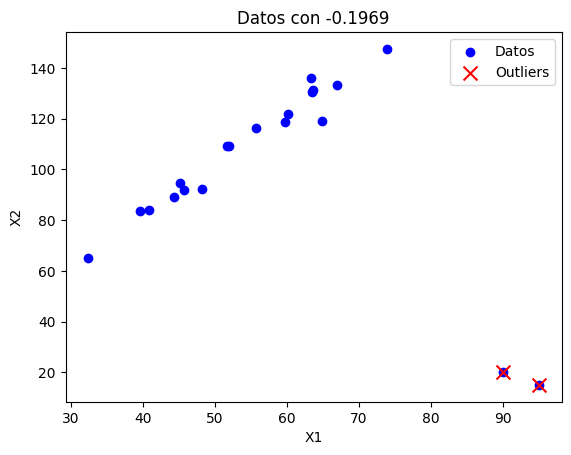

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
# Datos normales con una clara correlación entre ellos: X2 = 2 X1 + ruido
np.random.seed(449)
x1 = np.random.normal(50, 10, 20)
x2 = 2 * x1 + np.random.normal(0, 5, 20)
# Introducimos dos outliers
x1[-2:] = [90, 95]
# Valores atípicos en X
x2[-2:] = [20, 15]
# Valores atípicos en Y
# Calcular correlación de Pearson
cor_pearson, _ = pearsonr(x1, x2)
# Implementación de Jackknife para la correlación
def correlacion_jackknife(x, y):
    n = len(x)
    corrs = []
    for i in range(n):
        x_i = np.delete(x, i)
        y_i = np.delete(y, i)
        corr, _ = pearsonr(x_i, y_i)
        corrs.append(corr)
    return np.mean(corrs)
cor_jackknife = correlacion_jackknife(x1, x2)
# Mostrar resultados
print(f"Correlación de Pearson: {cor_pearson:.4f}")
print(f"Correlación Jackknife:  {cor_jackknife:.4f}")
# Visualizar los datos
plt.scatter(x1, x2, color='blue', label="Datos")
plt.scatter(x1[-2:], x2[-2:], color='red', label="Outliers", marker='x', s=100)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title(f"Datos con {cor_jackknife:.4f}")
plt.legend()

 EJEMPLO 13: Cálculo de coeficientes de correlación para vectores binarios.


In [13]:
import numpy as np

# Para vectores binarios
def coeficiente_smc(x, y):
    assert len(x) == len(y), "Los vectores deben tener la misma longitud"
    a = np.sum((x == 1) & (y == 1))  # Ambos 1
    d = np.sum((x == 0) & (y == 0))  # Ambos 0
    total = len(x)
    return (a + d) / total  # Fórmula de SMC

def coeficiente_jaccard(x, y):
    assert len(x) == len(y), "Los vectores deben tener la misma longitud"
    a = np.sum((x == 1) & (y == 1))  # Ambos 1
    b = np.sum((x == 1) & (y == 0))  # 1 en x, 0 en y
    c = np.sum((x == 0) & (y == 1))  # 0 en x, 1 en y
    return a / (a + b + c) if (a + b + c) > 0 else 0  # Fórmula de Jaccard

# Vectores binarios de ejemplo
x = np.array([1, 0, 1, 1, 0, 1, 0, 1, 0])
y = np.array([1, 1, 0, 1, 0, 0, 1, 1, 0])

smc = coeficiente_smc(x, y)
print(f"Correlación SMC: {smc:.2f} Distancia= {1 - smc:.3f}")

jaccard = coeficiente_jaccard(x, y)
print(f"Correlación Jaccard: {jaccard:.2f} Distancia={1 - jaccard:.3f}")

Correlación SMC: 0.56 Distancia= 0.444
Correlación Jaccard: 0.43 Distancia=0.571


 EJEMPLO 14: Cálculo de la similitud del coseno.


In [14]:
import numpy as np

def similitud_coseno(x, y):
    producto_dot = np.dot(x, y) # Producto escalar
    norma_x = np.linalg.norm(x) # Norma del vector x
    norma_y = np.linalg.norm(y) # Norma del vector y
    return producto_dot / (norma_x * norma_y) if norma_x * norma_y != 0 else 0

a = np.array([1, 2, 3, 4, 5])
b = np.array([2, 3, 4, 5, 6])

sim_coseno = similitud_coseno(a, b)
print(f"Similitud del coseno: {sim_coseno:.3f} Distancia={1 - sim_coseno:.3f}")

Similitud del coseno: 0.995 Distancia=0.005


EJEMPLO 15: Aplicar el método Elbow para averiguar la cantidad óptima de grupos a utilizar.


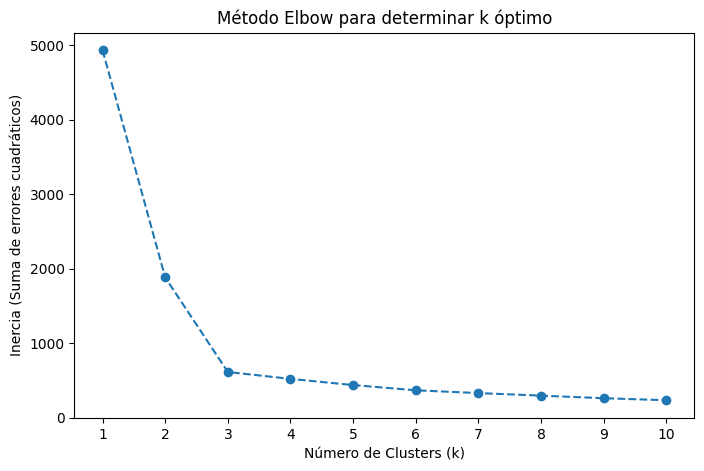

In [15]:
# Aplicar el método Elbow
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generar datos simulados con 3 clusters
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=449)
# Probar diferentes valores de k y calcular la inercia
inercia = []
K_rango = range(1, 11)
for k in K_rango:
    kmeans = KMeans(n_clusters=k, random_state=449, n_init=10)
    kmeans.fit(X)
    inercia.append(kmeans.inertia_)

# Graficar el método Elbow
plt.figure(figsize=(8, 5))
plt.plot(K_rango, inercia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia (Suma de errores cuadráticos)')
plt.title('Método Elbow para determinar k óptimo')
plt.xticks(K_rango)
plt.show()

 EJEMPLO 16: Calcular el coeficiente silouette de forma manual.


In [16]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist

def silhouette_score_manual(X, labels):
    """
    Calcula el coeficiente de Silhouette sin usar sklearn.

    Parámetros:
    X: np.array con los datos (n_muestras, n_características)
    labels: np.array con las etiquetas asignadas a cada punto

    Devuelve:
    Silhouette Score promedio de todos los puntos.
    """
    labels_unicas = np.unique(labels)
    n = X.shape[0]
    valores_silueta = np.zeros(n)

    for i in range(n):
        punto_actual = X[i]
        cluster_i = labels[i]
        d = cdist([punto_actual], X, metric='euclidean').flatten() # Dist. todos ptos

        # Calcular a(i): Distancia promedio a puntos del mismo cluster
        mascara_mismo_cluster = labels == cluster_i
        mascara_mismo_cluster[i] = False # Evitar compararse con sí mismo
        if np.any(mascara_mismo_cluster):
            a_i = np.mean(d[mascara_mismo_cluster])
        else:
            a_i = 0 # Si es el único punto en el cluster

        # Calcular b(i): Distancia promedio con el cluster más cercano
        b_i = np.inf
        for cluster_j in labels_unicas:
            if cluster_j == cluster_i:
                continue
            mascara_otros_cluster = labels == cluster_j
            d_media = np.mean(d[mascara_otros_cluster])
            b_i = min(b_i, d_media)

        # Silhouette del punto i
        if (a_i < b_i):
            valores_silueta[i] = (b_i - a_i) / b_i
        elif (a_i > b_i):
            valores_silueta[i] = (b_i - a_i) / a_i
        else:
            valores_silueta[i] = 0

    return np.mean(valores_silueta)

# Datos simulados con 3 clusters
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=449)
# Aplicar KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=449, n_init=10)
labels = kmeans.fit_predict(X)

# Calcular el Silhouette Score manualmente
silhouette_manual = silhouette_score_manual(X, labels)
print(f"Silhouette Score calculado manualmente: {silhouette_manual:.4f}")

Silhouette Score calculado manualmente: 0.6393


EJEMPLO 17: Encontrar el número óptimo de clusters usando el coeficiente silueta usando el
método sklearn.metrics.silhouette_score.

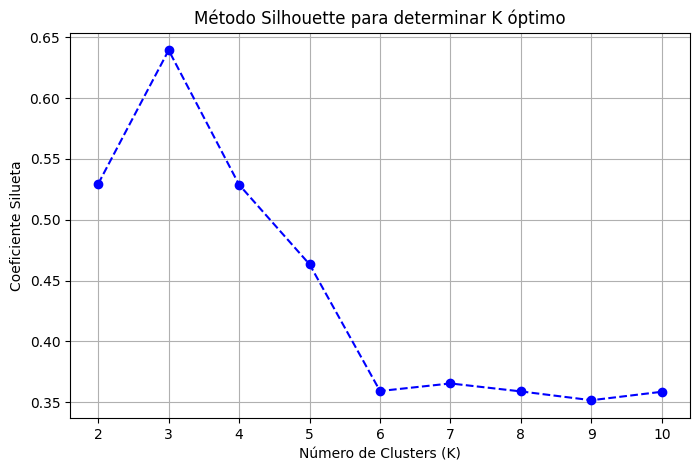

El número óptimo de clusters según silueta es: 3


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Generar datos simulados con 3 clusters
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=449)

def calcular_siluetas(X, max_clusters=10): # X: array 2D
    scores_silueta = []
    K_rango = range(2, max_clusters + 1) # silueta no tiene sentido en K=1
    for n_clusters in K_rango:
        kmeans = KMeans(n_clusters=n_clusters, random_state=449, n_init=10)
        cluster_labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        scores_silueta.append(silhouette_avg)
    return K_rango, scores_silueta

# Calcular el coeficiente silueta
K_rango, scores_silueta = calcular_siluetas(X)
# Graficar los valores de Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K_rango, scores_silueta, marker='o', linestyle='--', color='b')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Coeficiente Silueta')
plt.title('Método Silhouette para determinar K óptimo')
plt.xticks(K_rango)
plt.grid(True)
plt.show()

# Encontrar el K óptimo
K_optimo = K_rango[np.argmax(scores_silueta)]
print(f"El número óptimo de clusters según silueta es: {K_optimo}")

 EJEMPLO 18: Encontrar el número óptimo de clusters usando el estadístico gap.


Text(0.5, 1.0, 'Método Estadístico Gap. k óptimo=4')

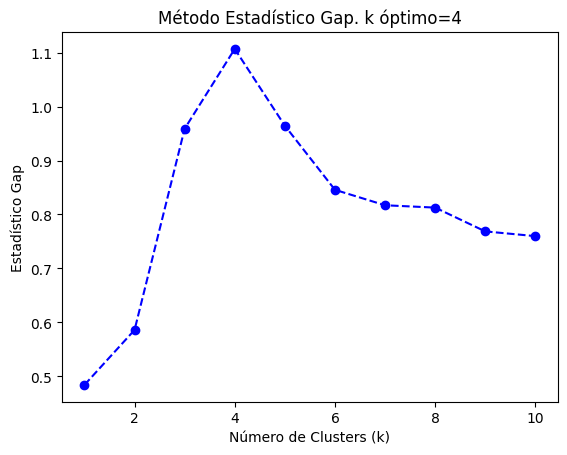

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

def calcula_Wk(X, labels, centro_clusters): # La dispersión intra-cluster W_k
    n_clusters = len(centro_clusters)
    Wk = 0
    for k in range(n_clusters):
        puntos_cluster = X[labels == k]
        if len(puntos_cluster) > 1:
            Wk += np.sum(np.linalg.norm(puntos_cluster - centro_clusters[k], axis=1)**2)
    return Wk

def estadistico_gap(X, max_k=10, B=10):
    ks = np.arange(1, max_k + 1)
    valores_gap = []
    for k in ks:
        # Aplicar K-Means a los datos reales
        kmeans = KMeans(n_clusters=k, random_state=449, n_init=10)
        labels = kmeans.fit_predict(X)
        centro_clusters_ = kmeans.cluster_centers_
        Wk = calcula_Wk(X, labels, centro_clusters_)

        # Generar datos aleatorios y calcular Wk en distribuciones aleatorias
        random_Wks = []
        for _ in range(B):
            X_random = np.random.uniform(X.min(axis=0), X.max(axis=0), size=X.shape)
            km_random = KMeans(n_clusters=k, random_state=449, n_init=10)
            labels_random = km_random.fit_predict(X_random)
            centro_clusters_random = km_random.cluster_centers_
            Wk_random = calcula_Wk(X_random, labels_random, centro_clusters_random)
            random_Wks.append(np.log(Wk_random))

        # Calcular el estadístico Gap
        log_Wk = np.log(Wk)
        E_log_Wk = np.mean(random_Wks)
        gap_k = E_log_Wk - log_Wk
        valores_gap.append(gap_k)
    return ks, valores_gap

X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=449)
# Calcular Estadístico Gap y graficar el resultado
ks, valores_gap = estadistico_gap(X, max_k=10)
k_optimo = ks[np.argmax(valores_gap)]
plt.plot(ks, valores_gap, marker='o', linestyle='dashed', color='b')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Estadístico Gap")
plt.title(f"Método Estadístico Gap. k óptimo={k_optimo}")

 EJEMPLO 19: Realizar un agrupamiento con k-means y mostrar su inercia y coeficientes silueta,
dbi y chi.

In [19]:
from sklearn.cluster import KMeans

X = [[1,2], [2,3], [3,4], [8,9], [9,10], [10,11]] # Datos de ejemplo
km = KMeans(n_clusters=2, random_state=449, n_init=10)
km.fit(X)
print(f"Inercia: {km.inertia_:.2f}")

from sklearn.metrics import silhouette_score
labels = km.labels_ # Etiquetas asignadas por el clustering
s = silhouette_score(X, labels)
print(f"Silhouette Score: {s:.2f}")

print(f"Índice de Silueta: {s:.2f}")

from sklearn.metrics import davies_bouldin_score
dbi = davies_bouldin_score(X, labels)
print(f"Índice de Davies-Bouldin: {dbi:.2f}")

from sklearn.metrics import calinski_harabasz_score
chi = calinski_harabasz_score(X, labels)
print(f"Índice de Calinski-Harabasz: {chi:.2f}")

Inercia: 8.00
Silhouette Score: 0.81
Índice de Silueta: 0.81
Índice de Davies-Bouldin: 0.19
Índice de Calinski-Harabasz: 73.50


EJEMPLO 20: Aplicar el clustering jerárquico aglomerativo al dataset iris y generar su
dendrograma.

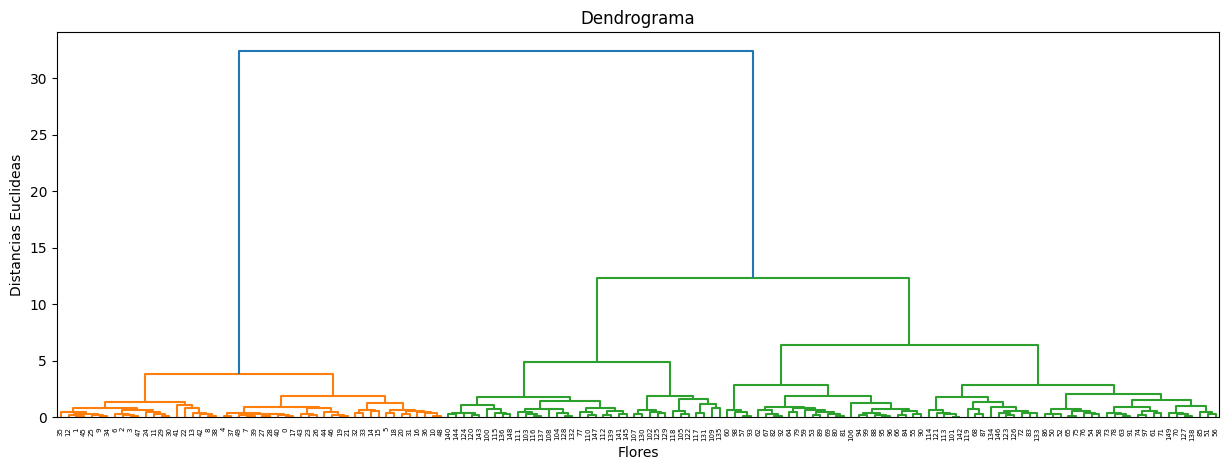

In [20]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
modelo = AgglomerativeClustering(n_clusters=3, linkage='ward')

y_pred = modelo.fit_predict(X)

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.title('Dendrograma')
plt.xlabel('Flores')
plt.ylabel('Distancias Euclideas')

# create linkage matrix
link_matrix = linkage(X, method='ward')
dendrograma = dendrogram(link_matrix)
plt.show()

 EJEMPLO 21: Calcular el número óptimo de clusters usando el índice silhouette.


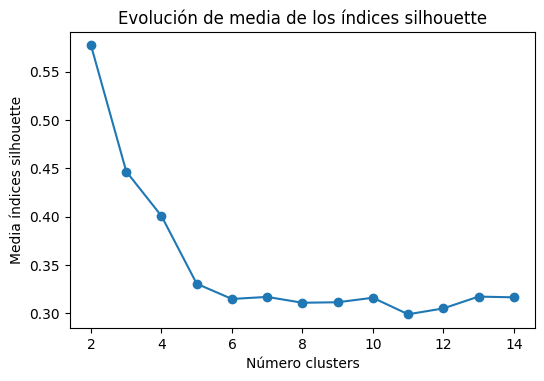

AgglomerativeClustering()

In [21]:
from sklearn.preprocessing import StandardScaler
X_escalado = StandardScaler().fit_transform(X)
n_clusters = range(2, 15)
valores_medios_silhouette = []

for nc in n_clusters:
    modelo = AgglomerativeClustering(linkage='ward', n_clusters=nc)
    cluster_labels = modelo.fit_predict(X_escalado)
    media_silueta = silhouette_score(X_escalado, cluster_labels)
    valores_medios_silhouette.append(media_silueta)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')
plt.show()

modelo = AgglomerativeClustering(linkage='ward', n_clusters=2, metric='euclidean')
modelo.fit(X_escalado)

In [22]:
from sklearn.cluster import MiniBatchKMeans
mb_km = MiniBatchKMeans(n_clusters=5)
mb_km.fit(X)

MiniBatchKMeans(n_clusters=5)

 EJEMPLO 10: Los siguientes datos simulados contienen observaciones que pertenecen a cuatro
grupos distintos. Se pretende aplicar K-means con el objetivo de identificar las agrupaciones reales.

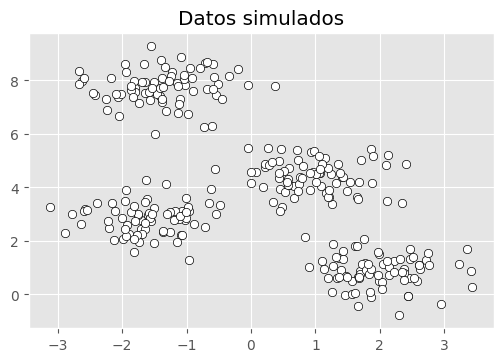

In [23]:
# Tratamiento de datos
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') # or plt.style.use('ggplot')

# Preprocesado y modelado
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

# Simulación de datos
X, y = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=0.60, shuffle=True, random_state=0)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.scatter(x=X[:, 0], y=X[:, 1], c='white', marker='o', edgecolor='black')
ax.set_title('Datos simulados')
plt.show()

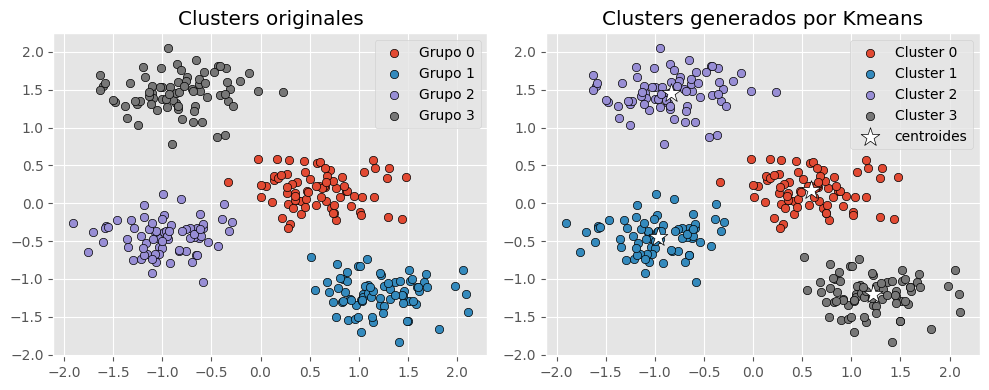

In [24]:
X_escalado = scale(X) # Escalado de datos
km = KMeans(n_clusters=4, n_init=25, random_state=123) # Modelo
km.fit(X_escalado)
y_pred = km.predict(X_escalado) # Clasificación con el modelo kmeans

# Representación gráfica: grupos originales vs clusters creados
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Grupos originales
for i in np.unique(y):
    ax[0].scatter(x=X_escalado[y == i, 0], y=X_escalado[y == i, 1],
                   c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
                   marker='o', edgecolor='black', label=f'Grupo {i}')
ax[0].set_title('Clusters originales')
ax[0].legend()

# Grupos generados por k-means
for i in np.unique(y_pred):
    ax[1].scatter(x=X_escalado[y_pred == i, 0], y=X_escalado[y_pred == i, 1],
                   c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
                   marker='o', edgecolor='black', label=f'Cluster {i}')
ax[1].scatter(x=km.cluster_centers_[:, 0], y=km.cluster_centers_[:, 1],
               c='white', edgecolor='black', s=200, marker='*', label='centroides')
ax[1].set_title('Clusters generados por Kmeans')
ax[1].legend()

plt.tight_layout()
plt.show()

In [25]:
# Matriz de confusión: Grupos originales vs clusters creados
print(pd.crosstab(y, y_pred, dropna=False, rownames=['Grupo_real'], colnames=['Cluster']))

Cluster      0   1   2   3
Grupo_real                
0           75   0   0   0
1            0   0   0  75
2            0  75   0   0
3            0   0  75   0


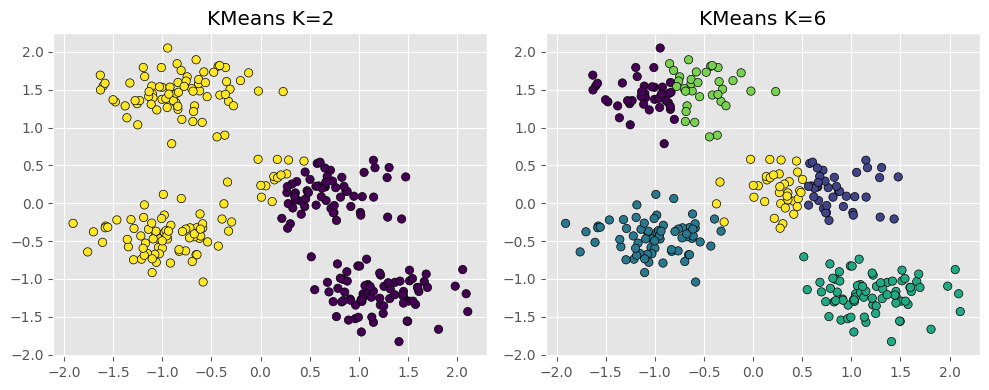

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Resultados para K = 2
y_predict_k2 = KMeans(n_clusters=2, n_init=25, random_state=123).fit_predict(X_escalado)
ax[0].scatter(x=X_escalado[:, 0], y=X_escalado[:, 1],
               c=y_predict_k2, cmap='viridis', marker='o', edgecolor='black')
ax[0].set_title('KMeans K=2')

# Resultados para K = 6
y_predict_k6 = KMeans(n_clusters=6, n_init=25, random_state=123).fit_predict(X_escalado)
ax[1].scatter(x=X_escalado[:, 0], y=X_escalado[:, 1],
               c=y_predict_k6, cmap='viridis', marker='o', edgecolor='black')
ax[1].set_title('KMeans K=6')

plt.tight_layout()
plt.show()

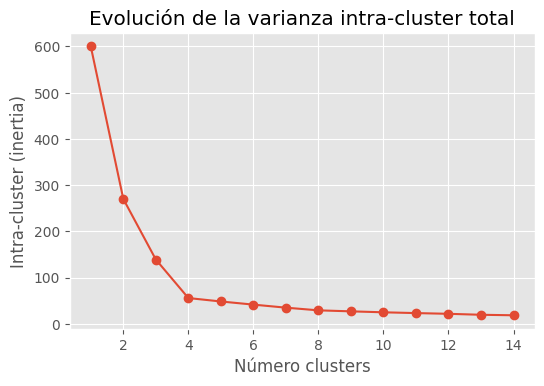

In [27]:
# Método elbow para identificar el número óptimo de clusters
rango_n_clusters = range(1, 15)
inertias = []

for n_clusters in rango_n_clusters:
    km = KMeans(n_clusters=n_clusters, n_init=20, random_state=123)
    km.fit(X_escalado)
    inertias.append(km.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(rango_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)')
plt.show()

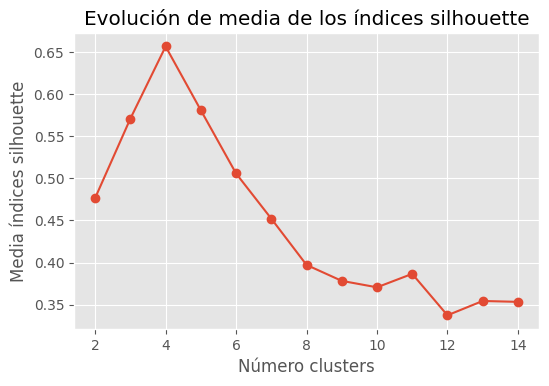

In [28]:
# Método silhouette para identificar el número óptimo de clusters
rango_n_clusters = range(2, 15)
valores_medios_silueta = []

for n_clusters in rango_n_clusters:
    km = KMeans(n_clusters=n_clusters, n_init=20, random_state=123)
    cluster_labels = km.fit_predict(X_escalado)
    media_silueta = silhouette_score(X_escalado, cluster_labels)
    valores_medios_silueta.append(media_silueta)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(rango_n_clusters, valores_medios_silueta, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')
plt.show()

 EJEMPLO 11:  Utilizar KMedoids.


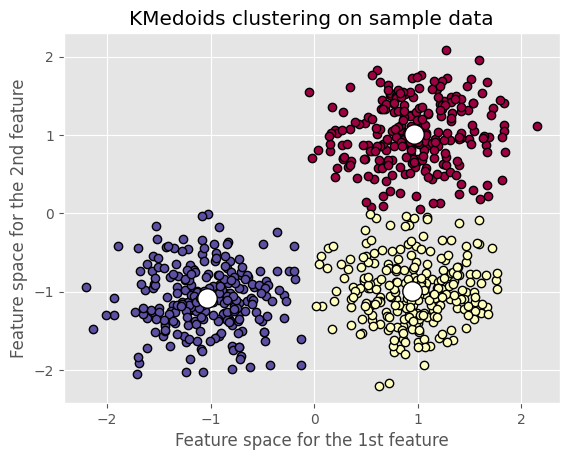

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# Generar datos de ejemplo
centros = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centros, cluster_std=0.4,
                            random_state=449)

# Calcular KMedoids
kmedoids = KMeans(n_clusters=3, random_state=449, init='k-means++')
kmedoids.fit(X)
etiquetas = kmedoids.labels_

# Dibujar resultados
etiquetas_unicas = set(etiquetas)
colores = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(etiquetas_unicas))]
for k, col in zip(etiquetas_unicas, colores):
    mascara_miembro = (etiquetas == k)
    xy = X[mascara_miembro]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

# Dibujar los medoides
plt.plot(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], 'o',
         markerfacecolor='white', markeredgecolor='k', markersize=14)

plt.title('KMedoids clustering on sample data')
plt.xlabel('Feature space for the 1st feature')
plt.ylabel('Feature space for the 2nd feature')
plt.show()

Text(0.5, 1.0, 'Agrupamiento realizado con KMedoids. Los medoides se representan en cyan.')

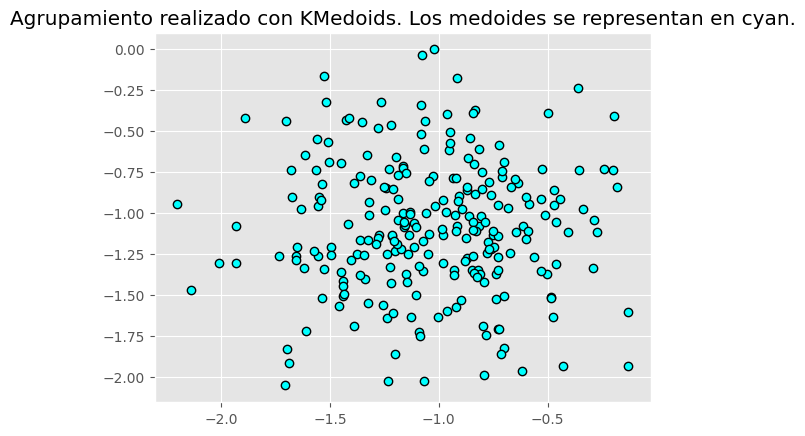

In [35]:
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor="cyan",
             markeredgecolor='k', markersize=6)

plt.title("Agrupamiento realizado con KMedoids. Los medoides se representan en cyan.")

 EJEMPLO 12: Aplicamos DBSCAN a multishape.csv, los datos de la figura 16.


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import scale

# Cargar datos
datos = pd.read_csv('multishape.csv')
# Escalado de datos
X = datos.drop(columns='shape').to_numpy()
X_escalado = scale(X)
# Modelo
modelo_dbscan = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
modelo_dbscan.fit(X_escalado)
etiquetas = modelo_dbscan.labels_
fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))
ax.scatter(x=X_escalado[etiquetas!=-1, 0], y=X_escalado[etiquetas!=-1, 1], c=etiquetas[etiquetas!=-1], marker='o', edgecolor='black', cmap='viridis')
# Los outliers se identifican con el label -1
ax.scatter(x=X_escalado[etiquetas==-1, 0], y=X_escalado[etiquetas==-1, 1], c='red', marker='o', edgecolor='black', label='outliers')
ax.legend()
ax.set_title('Clusters generados por DBSCAN')
ax.set_xlabel('F\'Número de clusters y observaciones "outliers"')
n_clusters = len(set(etiquetas)) - (1 if -1 in etiquetas else 0)
n_ruido = list(etiquetas).count(-1)
print(f'Número de clusters: {n_clusters} y de outliers: {n_ruido}')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'multishape.csv'

EJEMPLO 14: Los siguientes datos simulados contienen observaciones que pertenecen a cuatro
grupos distintos. Se pretende aplicar clustering basado en un Gaussian mixture model con el objetivo
de identificar las agrupaciones reales.

In [ ]:
# Tratamiento de datos
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
# Gráficos
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Ellipse
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
# Preprocesado y modelado
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
# Configuración warnings
import warnings
warnings.filterwarnings('ignore')
# Simulación de datos
X, y = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=0.60, shuffle=True,
             random_state=0)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.scatter( x=X[:, 0], y=X[:, 1], c='white', marker='o', edgecolor='black', )
ax.set_title('Datos simulados')
# Modelo
modelo_gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=123)
modelo_gmm.fit(X=X)
# Media de cada componente
print("Medias de cada componente:",  modelo_gmm.means_)
# Matriz de covarianza de cada componente
print("Matriz de covarianza de cada compenente\n", modelo_gmm.covariances_)

 EJEMPLO 15: Es una continuación del ejemplo anterior. Cada fila es una observación y cada
columna es la probabilidad de pertenecer a cada una de las gausianas componentes.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpl
import numpy as np

probabilidades = modelo_gmm.predict_proba(X)
print(probabilidades)
clasificacion = modelo_gmm.predict(X)
print(clasificacion)
# Representación gráfica
# Codigo obtenido de:
#
# https://github.com/amueller/COMS4995-s20/tree/master/slides/aml-14-clustering-mixture-models


def make_ellipses(gmm, ax):
    for n in range(gmm.n_components):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convertir a grados
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        for i in range(1, 3):
            ell = mpl.patches.Ellipse(
                gmm.means_[n],
                i * v[0],
                i * v[1],
                180 + angle,
                color="blue",
            )
            ell.set_clip_box(ax.bbox)
            ell.set_alpha(0.1)
            ax.add_artist(ell)


fig, axs = plt.subplots(1, 2, figsize=(12, 3.84))
# Distribución de probabilidad de cada componente
for i in np.unique(clasificacion):
    axs[0].scatter(
        x=X[clasificacion == i, 0],
        y=X[clasificacion == i, 1],
        c=plt.rcParams["axes.prop_cycle"].by_key()["color"][i],
        marker="o",
        edgecolor="black",
        label=f"Componente {i}",
    )
    make_ellipses(modelo_gmm, ax=axs[0])
    axs[0].set_title("Distribución de prob. de cada componente")
    axs[0].legend()
# Distribución de probabilidad del modelo completo
xs = np.linspace(min(X[:, 0]), max(X[:, 0]), 1000)
ys = np.linspace(min(X[:, 1]), max(X[:, 1]), 1000)
xx, yy = np.meshgrid(xs, ys)
scores = modelo_gmm.score_samples(np.c_[xx.ravel(), yy.ravel()])
axs[1].scatter(X[:, 0], X[:, 1], s=5, alpha=0.6, c=plt.cm.tab10(clasificacion))
scores = np.exp(scores)  # Las probabilidades están en log

axs[1].contour(xx, yy, scores.reshape(xx.shape),
                levels=np.percentile(scores, np.linspace(0, 100, 10))[1:-1])
axs[1].set_title("Distribución de prob. del modelo completo")
plt.tight_layout()
plt.show()


 EJEMPLO 16: Es una continuación del ejemplo anterior. Gráficos de desempeño del modelo según
el número de clusters usando métricas estadísticas AIC y BIC.

In [ ]:
n_components = range(1, 21)
valores_bic = []
valores_aic = []
for i in n_components:
    modelo = GaussianMixture(n_components=i, covariance_type="full")
    modelo = modelo.fit(X)
    valores_bic.append(modelo.bic(X))
    valores_aic.append(modelo.aic(X))
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(n_components, valores_bic, label='BIC')
ax.plot(n_components, valores_aic, label='AIC')
ax.set_title("Valores BIC y AIC")
ax.set_xlabel("Número componentes")
ax.legend();
print(f"Número óptimo acorde al BIC: {range(1, 21)[np.argmin(valores_bic)]}")
print(f"Número óptimo acorde al AIC: {range(1, 21)[np.argmin(valores_aic)]}")
